In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("ex2data1.txt",header=None)
data.head()

0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1

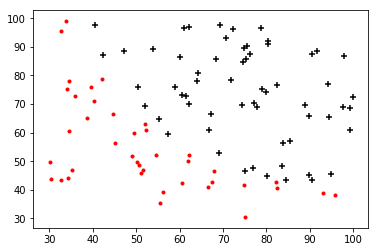

In [3]:
data = np.array(data)
plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1], c='black', marker='+')
plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1], c='red', marker='.')

In [4]:
X=np.array([np.ones(data.shape[0]), data[:,0], data[:,1]])
y=data[:,2].reshape((1,-1))
X.shape, y.shape

((3, 100), (1, 100))

In [5]:
theta = np.zeros((1, X.shape[0]))
theta.shape

(1, 3)

In [6]:
def hypo(theta, X):
    sig=1/(1+np.exp(-theta.dot(X)))
    return sig

In [7]:
def J(theta):
    th = theta.reshape((1,-1))
    yp = hypo(th,X)
    return -np.mean(y*np.log(yp)+(1-y)*np.log(1-yp))

def dJ(theta):
    th = theta.reshape((1,-1))
    m = y.shape[1]
    yp = hypo(th,X)
    err = yp-y
    return ((err.dot(X.T))/m).reshape((-1,))

In [8]:
hypo=spo.fmin_cg(f=J,x0=theta.reshape((-1,)),fprime=dJ)
hypo

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 129
         Function evaluations: 278
         Gradient evaluations: 278


/home/beast/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/beast/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


array([-25.16792199,   0.20628446,   0.20152486])

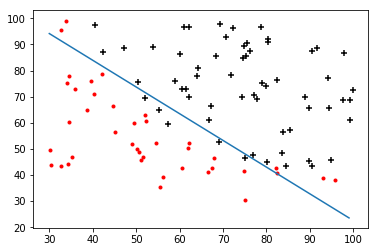

In [9]:
def plot_pts(data, theta):
    plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1], c='black', marker='+')
    plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1], c='red', marker='.')
    x = np.arange(30, 100)
    y = -(theta[0]+theta[1]*x)/theta[2]
    plt.plot(x,y)
    
plot_pts(data, hypo)